<a href="https://colab.research.google.com/github/sharadnatarajSJSU/CMPE255Assignment_1/blob/main/CMPE_255_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

 # **Loading Data into the notebook**

In [2]:
df1 = pd.read_csv("/content/hotel_bookings.csv")


Viewing features and size of the data set

In [3]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df1.shape

(119390, 32)

#Finding Null values

In [5]:
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#Finding unique values in each column

In [6]:
for col in df1:
    print(df1[col].name,df1[col].nunique())

hotel 2
is_canceled 2
lead_time 479
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
meal 5
country 177
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
agent 333
company 352
days_in_waiting_list 128
customer_type 4
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3
reservation_status_date 926


#Dropping features not necessary for building model

In [7]:
df2 = df1.drop(['country','agent','company','arrival_date_year','arrival_date_month','reservation_status','reservation_status_date','previous_cancellations','previous_bookings_not_canceled','distribution_channel','booking_changes','days_in_waiting_list','arrival_date_day_of_month',
'is_canceled','customer_type'],axis='columns')

In [8]:
df2.shape

(119390, 17)

#Handling NA/Null values
Most of the coloumns with null were dropped in the previous stage as they were irrelavent

In [9]:
df2["children"].fillna(0,inplace = True)

In [10]:
df2.isnull().sum()

hotel                          0
lead_time                      0
arrival_date_week_number       0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
market_segment                 0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
deposit_type                   0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [11]:
for col in df2:
    print(df2[col].name,df1[col].nunique())

hotel 2
lead_time 479
arrival_date_week_number 53
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
meal 5
market_segment 8
is_repeated_guest 2
reserved_room_type 10
assigned_room_type 12
deposit_type 3
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6


#Feature Engineering

In [12]:
df2['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [13]:
df3=df2.copy(deep= True)

In [14]:
df3['meal'] = df3['meal'].replace(['Undefined'],"SC")

In [15]:
df3['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

#Generalizing or Combining similar values  in Market Segment

In [16]:
df3['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [17]:
df3['market_segment'] = df3['market_segment'].replace(['Complementary','Undefined','Aviation','Groups'],"Corporate")
df3['market_segment'] = df3['market_segment'].replace(['Online TA','Offline TA/TO'],"Agent")

In [18]:
df3['market_segment'].unique()

array(['Direct', 'Corporate', 'Agent'], dtype=object)

In [19]:
df3['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

#Creating New feature as price per day per adult

In [20]:
df4 = df3.copy(deep= True)


In [21]:
df4['total_nights']= df4['stays_in_week_nights']+df4['stays_in_weekend_nights']

In [22]:
total_persons = df4['adults']+df4['children']
df4['price_perday_perperson'] = df4['adr']/total_persons/df4['total_nights']

Eliminating Null and inf Values

In [23]:
df4['price_perday_perperson']= df4['price_perday_perperson'].replace(np.nan,0)
df4['price_perday_perperson']= df4['price_perday_perperson'].replace(np.inf,0)

In [24]:
df4.isnull().sum()

hotel                          0
lead_time                      0
arrival_date_week_number       0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
market_segment                 0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
deposit_type                   0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
total_nights                   0
price_perday_perperson         0
dtype: int64

In [25]:
df4.shape

(119390, 19)

Testing for outliers

In [28]:
def remove_out_weekend(df):
    df_out= pd.DataFrame()
    m= np.mean(df.price_perday_perperson)
    sdev = np.std(df.price_perday_perperson)
    for key,subdf in df.groupby('hotel'):
      m= np.mean(subdf.price_perday_perperson)
      sdev = np.std(subdf.price_perday_perperson)
      reduced_df = subdf[(subdf.price_perday_perperson>(m-sdev))&(subdf.price_perday_perperson<=(m+sdev))]
      df_out= pd.concat([df_out,reduced_df], ignore_index= True)
    return df_out
  


In [29]:
df5 = remove_out_weekend(df4)

In [30]:
df4.shape

(119390, 19)

In [31]:
df5.shape

(104005, 19)

Plotting the Data Set

In [32]:
def plot_scatter(df):
  matplotlib.rcParams['figure.figsize'] = (20,20)
  plt.scatter(df.arrival_date_week_number,df.price_perday_perperson,color='red',label='Week Day',s=6)
 
  plt.xlabel("Arrival Week of the year")
  plt.ylabel("Price per day per person")
  plt.title("Cost per day")
  plt.legend()

Scatter plot of data before outlier removal

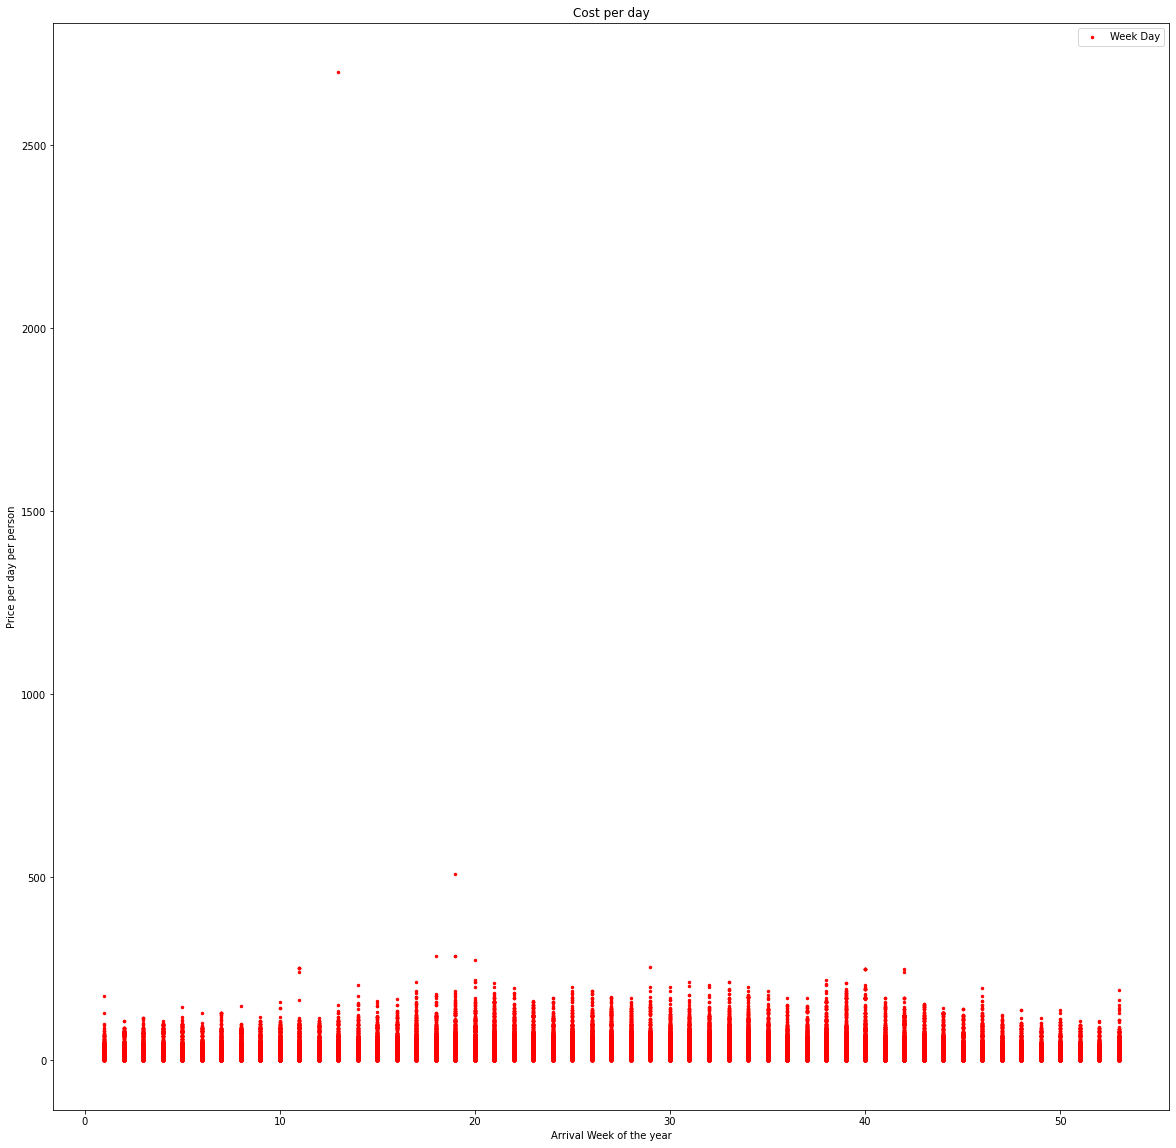

In [33]:
plot_scatter(df4)

Scatter plot of data after outlier removal

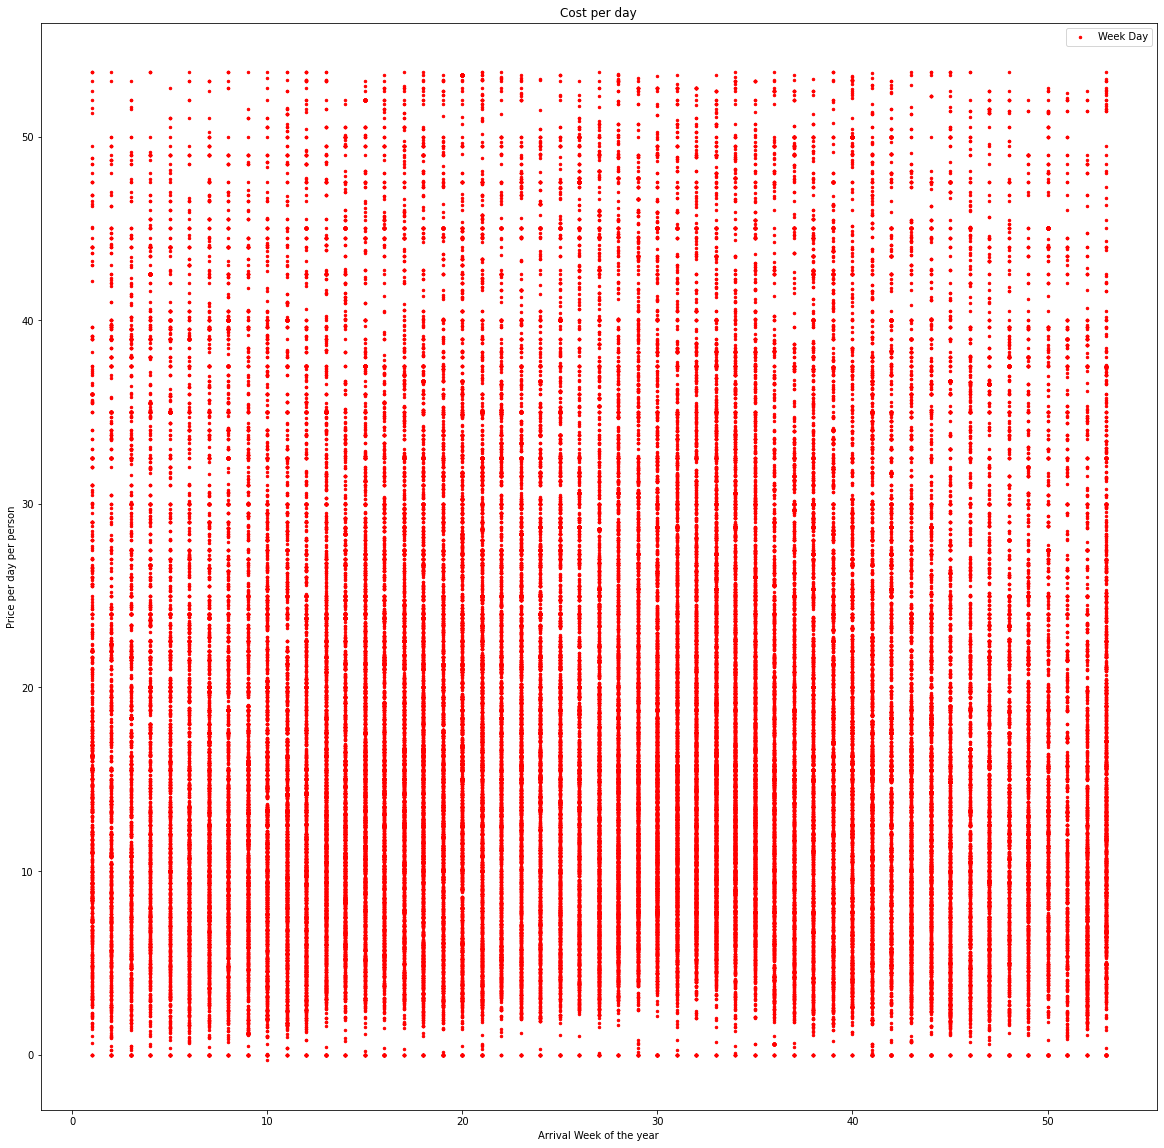

In [34]:
plot_scatter(df5)

Encoding Catagorical Data

In [35]:
pip install --upgrade category_encoders

In [36]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
encoder_onehot=ce.OneHotEncoder(cols='hotel',handle_unknown='return_nan',return_df=True,use_cat_names=True)
encoded_data = encoder_onehot.fit_transform(df5)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [38]:
encoded_data

,hotel_City Hotel,hotel_Resort Hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,adr,required_car_parking_spaces,total_of_special_requests,total_nights,price_perday_perperson
0,1.0,0.0,88,27,0,4,2,0.0,0,BB,Agent,0,A,A,No Deposit,76.50,0,1,4,9.562500
1,1.0,0.0,65,27,0,4,1,0.0,0,BB,Agent,0,A,A,No Deposit,68.00,0,1,4,17.000000
2,1.0,0.0,92,27,2,4,2,0.0,0,BB,Agent,0,A,A,No Deposit,76.50,0,2,6,6.375000
3,1.0,0.0,100,27,0,2,2,0.0,0,BB,Agent,0,A,A,No Deposit,76.50,0,1,2,19.125000
4,1.0,0.0,79,27,0,3,2,0.0,0,BB,Agent,0,A,A,No Deposit,76.50,0,1,3,12.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104000,0.0,1.0,212,35,2,8,2,1.0,0,BB,Agent,0,A,A,No Deposit,89.75,0,0,10,2.991667
104001,0.0,1.0,169,35,2,9,2,0.0,0,BB,Direct,0,E,E,No Deposit,202.27,0,1,11,9.194091
104002,0.0,1.0,204,35,4,10,2,0.0,0,BB,Direct,0,E,E,No Deposit,153.57,0,3,14,5.484643
104003,0.0,1.0,211,35,4,10,2,0.0,0,HB,Agent,0,D,D,No Deposit,112.80,0,1,14,4.028571


Using Binary Encoder for Arrival Week column as there are a large number of catagories

In [39]:
encoder_binary= ce.BinaryEncoder(cols=['arrival_date_week_number'],return_df=True)
encoded_data=encoder_binary.fit_transform(encoded_data)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [40]:
encoded_data

,hotel_City Hotel,hotel_Resort Hotel,lead_time,arrival_date_week_number_0,arrival_date_week_number_1,arrival_date_week_number_2,arrival_date_week_number_3,arrival_date_week_number_4,arrival_date_week_number_5,arrival_date_week_number_6,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,adr,required_car_parking_spaces,total_of_special_requests,total_nights,price_perday_perperson
0,1.0,0.0,88,0,0,0,0,0,0,1,0,4,2,0.0,0,BB,Agent,0,A,A,No Deposit,76.50,0,1,4,9.562500
1,1.0,0.0,65,0,0,0,0,0,0,1,0,4,1,0.0,0,BB,Agent,0,A,A,No Deposit,68.00,0,1,4,17.000000
2,1.0,0.0,92,0,0,0,0,0,0,1,2,4,2,0.0,0,BB,Agent,0,A,A,No Deposit,76.50,0,2,6,6.375000
3,1.0,0.0,100,0,0,0,0,0,0,1,0,2,2,0.0,0,BB,Agent,0,A,A,No Deposit,76.50,0,1,2,19.125000
4,1.0,0.0,79,0,0,0,0,0,0,1,0,3,2,0.0,0,BB,Agent,0,A,A,No Deposit,76.50,0,1,3,12.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104000,0.0,1.0,212,0,0,0,1,0,0,1,2,8,2,1.0,0,BB,Agent,0,A,A,No Deposit,89.75,0,0,10,2.991667
104001,0.0,1.0,169,0,0,0,1,0,0,1,2,9,2,0.0,0,BB,Direct,0,E,E,No Deposit,202.27,0,1,11,9.194091
104002,0.0,1.0,204,0,0,0,1,0,0,1,4,10,2,0.0,0,BB,Direct,0,E,E,No Deposit,153.57,0,3,14,5.484643
104003,0.0,1.0,211,0,0,0,1,0,0,1,4,10,2,0.0,0,HB,Agent,0,D,D,No Deposit,112.80,0,1,14,4.028571


In [41]:
encoder_binary= ce.BinaryEncoder(cols=['meal','market_segment','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type'],return_df=True)
encoded_data = encoder_binary.fit_transform(encoded_data)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [42]:
encoded_data

,hotel_City Hotel,hotel_Resort Hotel,lead_time,arrival_date_week_number_0,arrival_date_week_number_1,arrival_date_week_number_2,arrival_date_week_number_3,arrival_date_week_number_4,arrival_date_week_number_5,arrival_date_week_number_6,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_0,meal_1,meal_2,market_segment_0,market_segment_1,market_segment_2,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,reserved_room_type_3,reserved_room_type_4,assigned_room_type_0,assigned_room_type_1,assigned_room_type_2,assigned_room_type_3,assigned_room_type_4,deposit_type_0,deposit_type_1,deposit_type_2,adr,required_car_parking_spaces,total_of_special_requests,total_nights,price_perday_perperson
0,1.0,0.0,88,0,0,0,0,0,0,1,0,4,2,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,76.50,0,1,4,9.562500
1,1.0,0.0,65,0,0,0,0,0,0,1,0,4,1,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,68.00,0,1,4,17.000000
2,1.0,0.0,92,0,0,0,0,0,0,1,2,4,2,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,76.50,0,2,6,6.375000
3,1.0,0.0,100,0,0,0,0,0,0,1,0,2,2,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,76.50,0,1,2,19.125000
4,1.0,0.0,79,0,0,0,0,0,0,1,0,3,2,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,76.50,0,1,3,12.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104000,0.0,1.0,212,0,0,0,1,0,0,1,2,8,2,1.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,89.75,0,0,10,2.991667
104001,0.0,1.0,169,0,0,0,1,0,0,1,2,9,2,0.0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,202.27,0,1,11,9.194091
104002,0.0,1.0,204,0,0,0,1,0,0,1,4,10,2,0.0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,153.57,0,3,14,5.484643
104003,0.0,1.0,211,0,0,0,1,0,0,1,4,10,2,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,112.80,0,1,14,4.028571


#Splitting data into Training and test data sets

In [43]:
df6 = encoded_data.copy(deep= True)
from sklearn.model_selection import train_test_split


In [44]:
df6.shape

(104005, 41)

In [46]:
X = df6.drop(['adr','price_perday_perperson'],axis='columns')


In [49]:
y=df6['price_perday_perperson']

In [50]:
X.head()

,hotel_City Hotel,hotel_Resort Hotel,lead_time,arrival_date_week_number_0,arrival_date_week_number_1,arrival_date_week_number_2,arrival_date_week_number_3,arrival_date_week_number_4,arrival_date_week_number_5,arrival_date_week_number_6,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_0,meal_1,meal_2,market_segment_0,market_segment_1,market_segment_2,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,reserved_room_type_3,reserved_room_type_4,assigned_room_type_0,assigned_room_type_1,assigned_room_type_2,assigned_room_type_3,assigned_room_type_4,deposit_type_0,deposit_type_1,deposit_type_2,required_car_parking_spaces,total_of_special_requests,total_nights
0,1.0,0.0,88,0,0,0,0,0,0,1,0,4,2,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,4
1,1.0,0.0,65,0,0,0,0,0,0,1,0,4,1,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,4
2,1.0,0.0,92,0,0,0,0,0,0,1,2,4,2,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,2,6
3,1.0,0.0,100,0,0,0,0,0,0,1,0,2,2,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,2
4,1.0,0.0,79,0,0,0,0,0,0,1,0,3,2,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,3


In [51]:
y.head()

0     9.5625
1    17.0000
2     6.3750
3    19.1250
4    12.7500
Name: price_perday_perperson, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Building the Model

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.4234219363119582

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.44048949, 0.42188755, 0.43039486, 0.45386356, 0.43195268])